In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")


Wholesale customers dataset has 440 samples with 6 features each.


In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [4]:
# Select three indices of your choice you wish to sample from the dataset
indices = [85,181,338]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,16117,46197,92780,1026,40827,2944
1,112151,29627,18148,16745,4948,8550
2,3,333,7021,15601,15,550


In [5]:
# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Grocery', axis=1)

# Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data, data.Grocery, test_size=0.25, random_state=42)

# Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor = regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)

# Report the score of the prediction using the testing set
from sklearn.metrics import r2_score
score = r2_score(y_test, prediction)
print("Prediction score is: {}".format(score))

Prediction score is: 0.7115325069726876


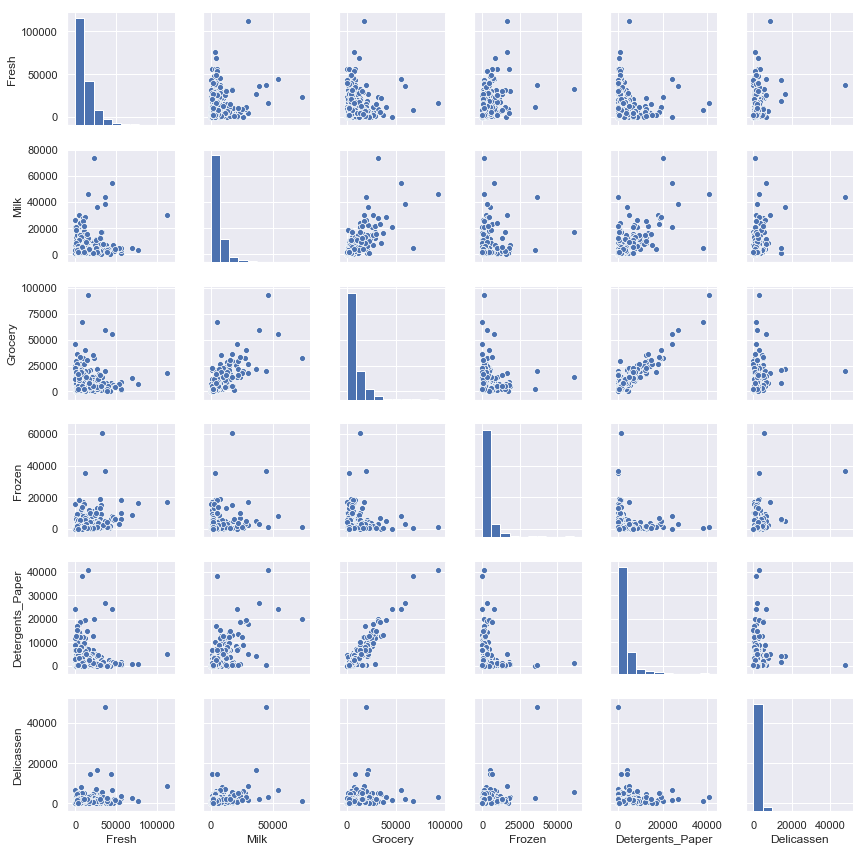

In [6]:
# Produce a scatter matrix for each pair of features in the data
sns.set()
sns.pairplot(data, height = 2)

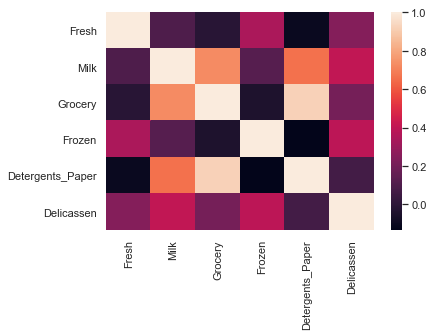

In [7]:
sns.heatmap(data.corr())

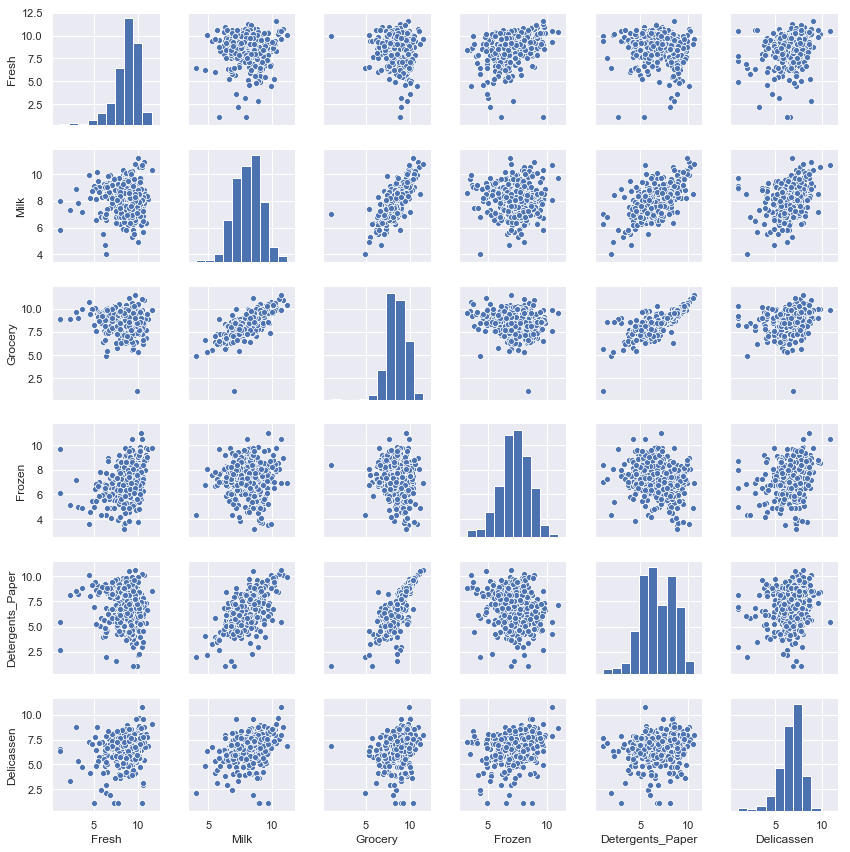

In [8]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
sns.set()
sns.pairplot(log_data, height = 2)

In [9]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
1,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
2,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


In [10]:
outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    lista = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    outliers.append(lista)
    
# OPTIONAL: Select the indices for data points you wish to remove


# Remove the outliers, if any were specified
#good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [11]:
outliers

[[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412],
 [86, 98, 154, 356],
 [75, 154],
 [38, 57, 65, 145, 175, 264, 325, 420, 429, 439],
 [75, 161],
 [66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]]

In [12]:
seen = {}
duplicates = []

for n in outliers:
    for index in n:
        if index not in seen:
            seen[index] = 1
        else:
            if seen[index] == 1:
                duplicates.append(index)
            seen[index] += 1
duplicates = sorted(duplicates)
duplicates

[65, 66, 75, 128, 154]

In [13]:
# Removing outliers

good_data = log_data.drop(duplicates, axis=0).reset_index(drop=True)

In [14]:
# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline


In [15]:
log_samples.shape

(3, 6)

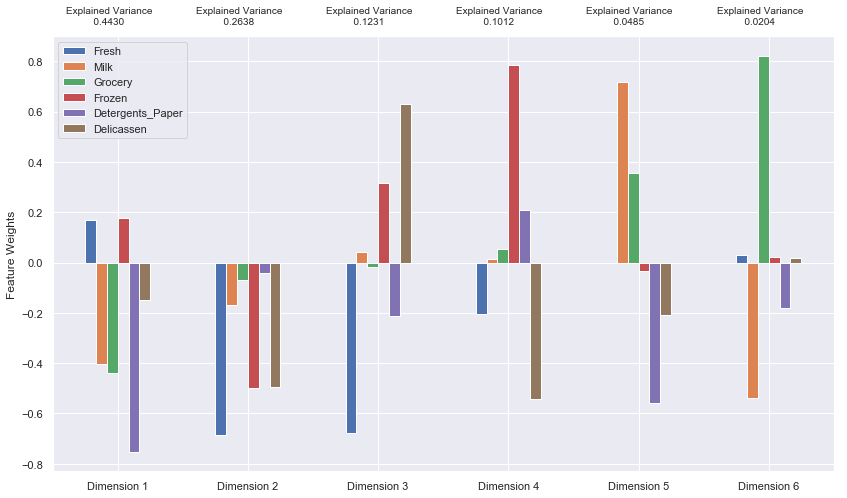

In [16]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=good_data.shape[1])
pca = pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [17]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-5.3316,-1.8845,-0.6957,-0.1972,0.5461,0.3802
1,-2.1899,-4.8605,0.0008,0.4827,0.5041,-0.1988
2,3.0206,4.8169,6.4519,2.7403,0.7788,2.1415


In [18]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [19]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-5.3316,-1.8845
1,-2.1899,-4.8605
2,3.0206,4.8169


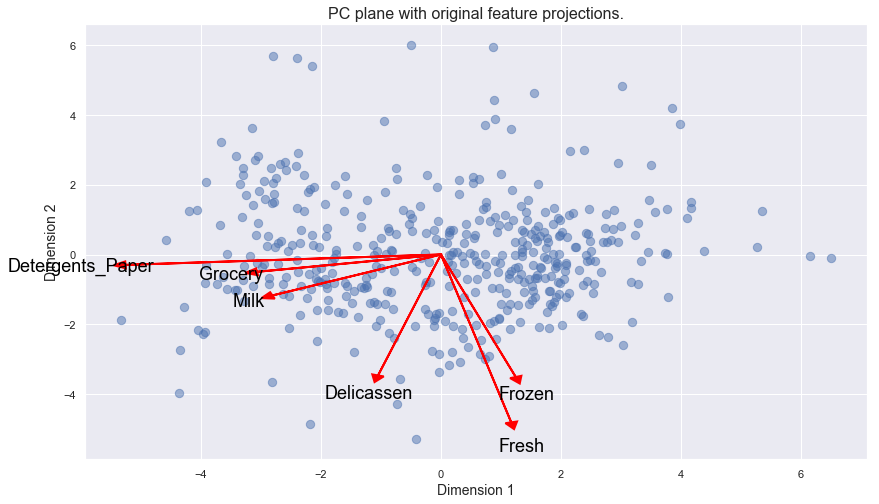

In [20]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scoresKM = {}
for j in range(2,7):
    
    print('Number of clusters: ' + str(j))
        
    # Apply your clustering algorithm of choice to the reduced data 
    clustererKM = KMeans(n_clusters=j, random_state=42)
    clustererKM.fit(reduced_data)

    # Predict the cluster for each data point
    predsKM = clustererKM.predict(reduced_data)

    # Find the cluster centers
    centersKM = clustererKM.cluster_centers_
    print('Cluster Center: ' + str(centersKM))

    # Predict the cluster for each transformed sample data point
    sample_predsKM = clustererKM.predict(pca_samples)
    print('Sample predictions: ' + str(sample_predsKM))

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    scoreKM = silhouette_score(reduced_data, predsKM)
    scoresKM[j] = scoreKM
    print('Silhouette score is: ' + str(scoreKM), '\n')
    
print('Scores: ' + str(scoresKM))

Number of clusters: 2
Cluster Center: [[ 1.49093664 -0.10743169]
 [-2.17322969  0.15659534]]
Sample predictions: [1 1 0]
Silhouette score is: 0.42628101546910835 

Number of clusters: 3
Cluster Center: [[ 1.74395866  0.04085513]
 [-1.59016368 -1.23678893]
 [-1.90807636  2.0962454 ]]
Sample predictions: [1 1 0]
Silhouette score is: 0.39689092644980506 

Number of clusters: 4
Cluster Center: [[-2.11389956  2.09087287]
 [ 2.10449052  0.93849594]
 [ 0.89218367 -1.1591779 ]
 [-2.23374077 -0.84600357]]
Sample predictions: [3 3 1]
Silhouette score is: 0.33184127600936947 

Number of clusters: 5
Cluster Center: [[-2.46489054  2.36797983]
 [ 1.03210924 -1.56132497]
 [ 2.79224416  0.61734971]
 [ 0.4990862   0.81839496]
 [-2.26923509 -0.8467196 ]]
Sample predictions: [4 4 2]
Silhouette score is: 0.34999779752629756 

Number of clusters: 6
Cluster Center: [[ 2.31364125 -0.11187673]
 [-2.47956542 -0.76708843]
 [-2.6711491   2.25842836]
 [ 0.22135212 -2.05653866]
 [ 0.16899208  0.56725174]
 [ 1.8792

In [22]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

scoresGauss = {}
for i in range(2,7):
    
    print('Number of clusters: ' + str(i))
        
    # Apply your clustering algorithm of choice to the reduced data 
    clustererGauss = GaussianMixture(random_state=42, n_components=i)
    clustererGauss.fit(reduced_data)

    # Predict the cluster for each data point
    predsGauss = clustererGauss.predict(reduced_data)

    # Find the cluster centers
    centersGauss = clustererGauss.means_
    print('Cluster Center: ' + str(centersGauss))

    # Predict the cluster for each transformed sample data point
    sample_predsGauss = clustererGauss.predict(pca_samples)
    print('Sample predictions: ' + str(sample_predsGauss))

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    scoreGauss = silhouette_score(reduced_data, predsGauss)
    scoresGauss[i] = scoreGauss
    print('Silhouette score is: ' + str(scoreGauss), '\n')
    
print('Scores: ' + str(scoresGauss))

Number of clusters: 2
Cluster Center: [[ 1.2512378  -0.18013806]
 [-2.22116886  0.31977698]]
Sample predictions: [1 1 0]
Silhouette score is: 0.42191684646261485 

Number of clusters: 3
Cluster Center: [[ 1.3874837  -0.24378903]
 [-2.04781298 -0.05820189]
 [-1.08932369  1.063399  ]]
Sample predictions: [2 2 2]
Silhouette score is: 0.4042487382407879 

Number of clusters: 4
Cluster Center: [[ 1.36580355  0.2583133 ]
 [-2.3145402   0.01022103]
 [-0.32043976  1.79401921]
 [ 1.17387101 -0.79626779]]
Sample predictions: [2 1 2]
Silhouette score is: 0.2932695648465841 

Number of clusters: 5
Cluster Center: [[ 1.71130552 -0.22201663]
 [-2.08799545 -0.5201485 ]
 [ 2.20617662  2.92837026]
 [ 0.03785843 -0.70356503]
 [-2.79826984  1.54857783]]
Sample predictions: [1 3 2]
Silhouette score is: 0.3004563887252593 

Number of clusters: 6
Cluster Center: [[ 0.62535432  0.56453323]
 [-1.99042622 -0.67842086]
 [ 2.11689604  3.15226455]
 [ 0.50197961 -1.80803617]
 [-2.79898205  1.72544922]
 [ 1.9303349

In [23]:
# Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, random_state=42)
clusterer.fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.cluster_centers_
print('Cluster Center: ' + str(centers))

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
print('Sample predictions: ' + str(sample_preds))

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
scoresKM[j] = score
print('Silhouette score is: ' + str(score), '\n')

Cluster Center: [[ 1.49093664 -0.10743169]
 [-2.17322969  0.15659534]]
Sample predictions: [1 1 0]
Silhouette score is: 0.42628101546910835 



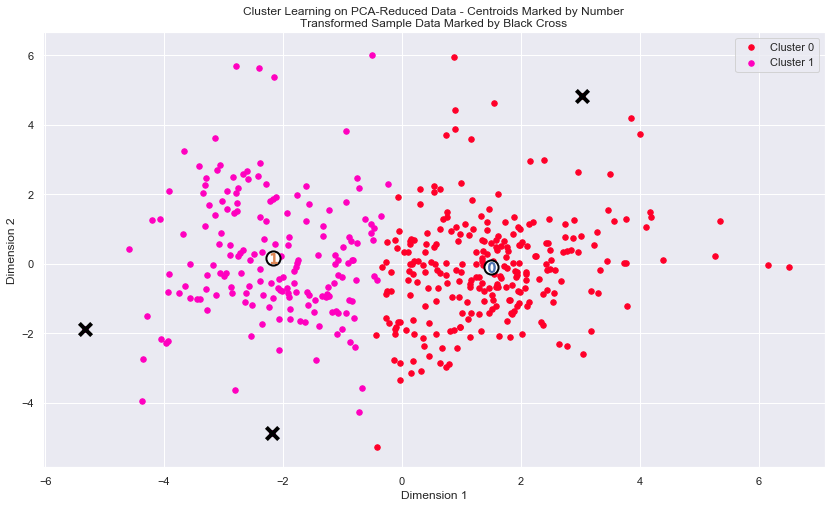

In [24]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

In [25]:
# Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(random_state=42, n_components=2)
clusterer.fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.means_
print('Cluster Center: ' + str(centers))

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
print('Sample predictions: ' + str(sample_preds))

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
scoresGauss[i] = score
print('Silhouette score is: ' + str(score), '\n')

Cluster Center: [[ 1.2512378  -0.18013806]
 [-2.22116886  0.31977698]]
Sample predictions: [1 1 0]
Silhouette score is: 0.42191684646261485 



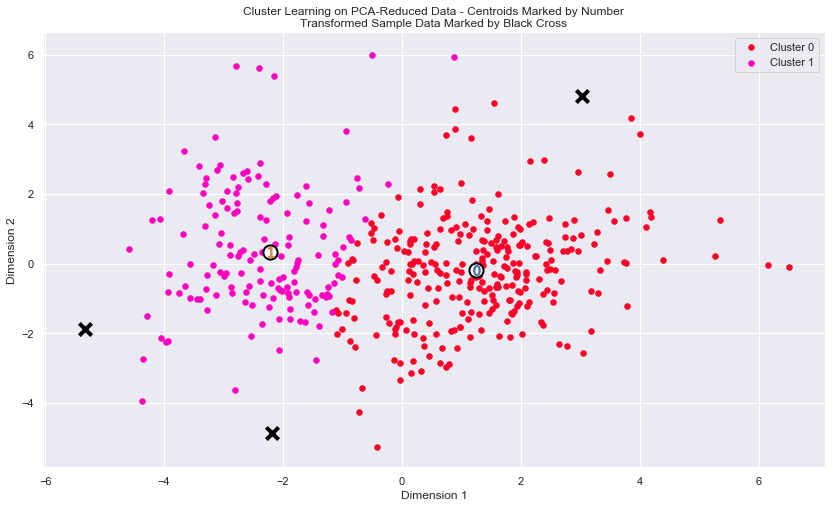

In [26]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

In [27]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,8953.0,2114.0,2765.0,2075.0,353.0,732.0
Segment 1,3552.0,7837.0,12219.0,870.0,4696.0,962.0


In [28]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [29]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


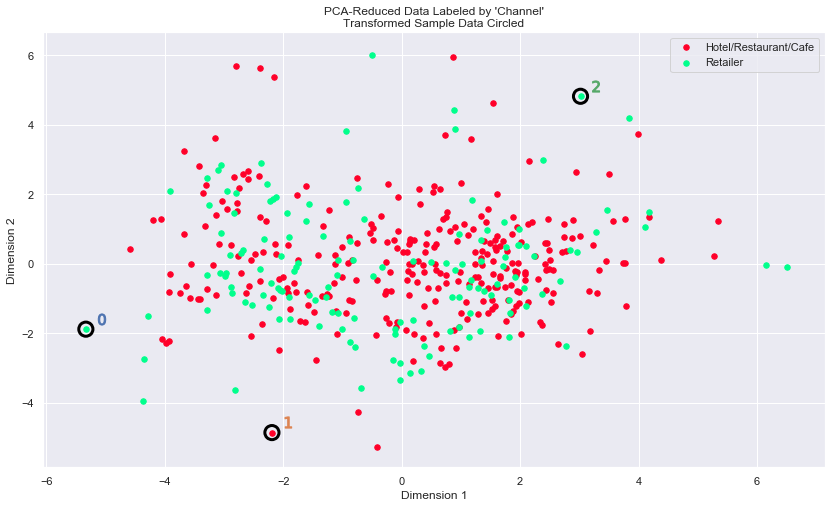

In [30]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, preds, pca_samples)